In [1]:
using Plots, Distributions, LinearAlgebra

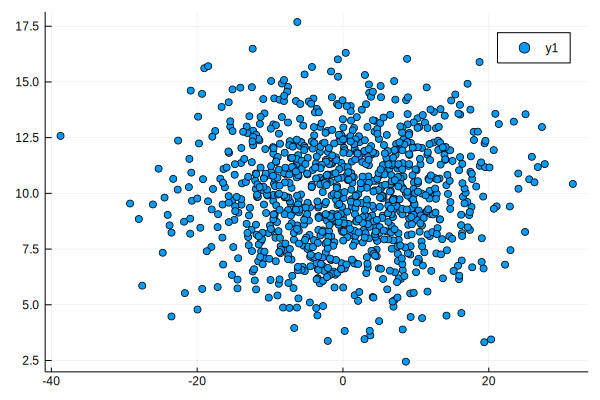

In [3]:
N = 1000

x_dist = Normal(0,10)
x = rand(x_dist, N)

y_dist = Normal(10,2.5)
y = rand(y_dist, N)
scatter(x,y)

In [4]:
A = [ones(N) x]
A_t = transpose(A)
b = y
x = inv(A_t*A)*A_t*b

2-element Array{Float64,1}:
 9.922783779341499   
 0.003796309534815587

In [208]:
N = 500

x_dist = Uniform(0,10)
x = rand(x_dist, N)

y_dist = Normal(0,250)
y = 3 .+ (1/2)*x - (1/5)*x.^2 .+ (1/3)*x.^3 .+ (1/6)*x.^4 + rand(y_dist, N)
x

500-element Array{Float64,1}:
 9.951947246654305 
 9.985672762515343 
 6.416159152598717 
 8.21562507214712  
 5.855862376092502 
 3.6498885599470388
 5.009972061719958 
 2.29041180020388  
 9.375945192192956 
 3.6470499317409   
 6.47595887666462  
 3.09445490984805  
 0.7207830655907066
 ⋮                 
 4.239539815088027 
 2.6205209758098413
 9.577075794770112 
 9.69120910515242  
 9.341224278592026 
 8.07507998989963  
 2.53836277796313  
 6.379739852916256 
 3.411412599567021 
 8.98546212247695  
 1.1717373721896474
 8.147242495930573 

In [209]:
# A = [ones(N) x x .^2]
# A_t = transpose(A)
# b = y
# β = inv(A_t*A)*A_t*b

In [244]:
function red_reg(lam ;num_coeff=2,x=x, y=y)
    A = ones(length(x))
    for i in 1:(num_coeff-1)
        println(i)
        A = cat(A,x .^i, dims=2)
        print(size(A))
    end
#     println(size(A))
#     print(A)
    A_t = transpose(A)
    
    sqr_matrix = A_t*A
    lam_matrix=""
    try
        lam_matrix = lam*(Matrix{Float64}(I,size(sqr_matrix)[1], size(sqr_matrix)[1]))
        lam_matrix[1,1]=0
        X = sqr_matrix +lam_matrix 
        return (inv(X)*A_t) *y
    catch 
        return lin_reg(num_coeff=num_coeff, x=x, y=y)
    end
    
   
        
end

function lin_reg(;num_coeff=2,x=x, y=y)
    
    A = ones(N)
    
    for i in 1:(num_coeff-1)
        A = cat(A, x .^i,dims=2)
    end
    
    return inv(transpose(A)*A)*transpose(A)*y
end


lin_reg (generic function with 1 method)

In [288]:
num_coeff = 3
beta_r = red_reg(1000, num_coeff=num_coeff)
# beta_2 = lin_reg(num_coeff=3)
# mean(y)

1
(500, 2)2
(500, 3)

3-element Array{Float64,1}:
 -67.00847743997511
 -32.29375437007347
  19.71833799784645

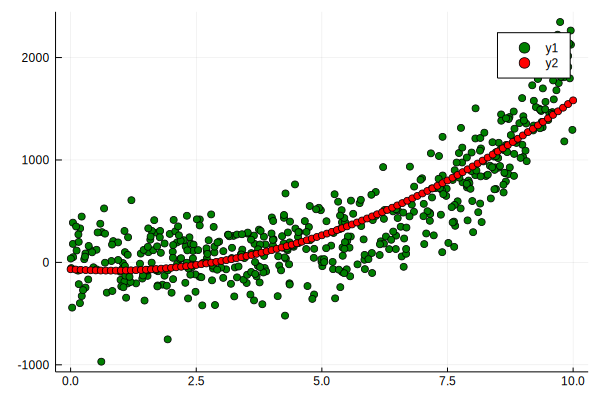

In [295]:
# scatter(x,y)
x_vec = 0:0.1:10
x_ary = [x_vec.^i for i in 0:num_coeff-1]
tem = (beta_r .* x_ary)
est = zeros(length(x_vec))
for i in 1:length(x_vec), j in 1:num_coeff
    est[i] += tem[j][i]
end
scatter(x,y, color=:green)
scatter!(x_vec,est, color=:red)

### The Lasso

In [274]:
using Optim

In [316]:
lambda = 100000000
f(x, b0, b1, b2, b3) = b0 + b1*x + b2*x^2 + b3*x^3 
l(b) = sum((y-f.(x,b[1],b[2],b[3],b[4])).^2) + lambda*sum(abs.(b[2:length(b)]))
out = optimize(l,[3.,4.0,1.,4.])
beta_l = out.minimizer 

4-element Array{Float64,1}:
 6.463214349874001    
 2.5375186867118693e-9
 8.529170462218162e-11
 1.0887807004318704   

In [317]:
et(x,b=beta_l) = b[1] + b[2]*x + b[3]*x^2 + b[4]*x^3

et (generic function with 2 methods)

In [318]:
A = [ones(N) x x.^2 x.^3]
no_eq = pinv(A)*y
a = [1,2,3,4]
a[2:length(a)]

3-element Array{Int64,1}:
 2
 3
 4

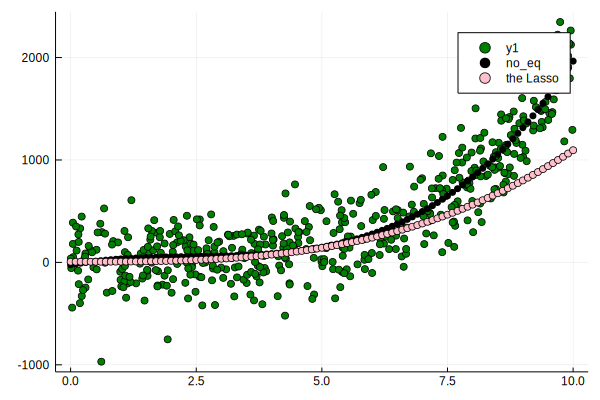

In [319]:
# x_ary = [x_vec.^i for i in 0:num_coeff-1]
# tem = (beta .* x_ary)
# est = zeros(length(x_vec))
# for i in 1:length(x_vec), j in 1:num_coeff
#     est[i] += tem[j][i]
# end
# scatter(x,y)
x_vec = 0:0.1:10
x_ary = [x_vec.^i for i in 0:num_coeff-1]
tem = (beta_r .* x_ary)
est = zeros(length(x_vec))
for i in 1:length(x_vec), j in 1:num_coeff
    est[i] += tem[j][i]
end
scatter(x,y, color=:green)
# scatter!(x_vec,est, color=:red, label="ridge")
scatter!(x_vec, no_eq[1] .+ no_eq[2]*x_vec .+ no_eq[3]*x_vec.^2 .+ no_eq[4]*x_vec.^3, label="no_eq", color=:black)
scatter!(x_vec,et.(x_vec), label="the Lasso", color=:pink)

In [311]:
a = Matrix{Float64}(I, 2, 2) 
b = 3*Matrix{Float64}(I,2,2)
a*b
size([1])

(1,)

In [88]:
x_ar = [1,2,3]
y_ar = [1,3,4]
cov(x_ar,y_ar)/var(x_ar)
num = (2*(x_ar[1]*y_ar[1]+x_ar[2]*y_ar[2]+x_ar[3]*y_ar[3])
    -(x_ar[1]*y_ar[2]+x_ar[1]*y_ar[3]+x_ar[2]*y_ar[1]+x_ar[2]*
        y_ar[3]+x_ar[3]*y_ar[1]+x_ar[3]*y_ar[2]))
denom = (2*(x_ar[1]^2+x_ar[2]^2+x_ar[3]^2)-(2*x_ar[1]*x_ar[2]
        +2*x_ar[2]*x_ar[3]+2*x_ar[1]*x_ar[3]))
num/denom

1.5

In [89]:
ary1 = [1,4,10]
var(ary1)*6
# 2*(ary1[1]^2+ary1[2]^2+ary1[3]^2)-2*(ary1[1]*ary1[2]+ary1[1]*ary1[3]+ary1[2]*ary1[3])

126.0

In [90]:
a2 = [1,3,4,9]
3*(a2[1]^2+a2[2]^2+a2[3]^2+a2[4]^2)-2*(a2[1]*a2[2]+a2[1]*a2[3]+a2[1]*a2[4]+a2[2]*a2[3]+a2[2]*a2[4]+a2[3]*a2[4])
# var(a2)*12

139

In [91]:
a3 = rand(DiscreteUniform(1,20),5)

5-element Array{Int64,1}:
  7
 11
 10
 14
  1

In [92]:
var(a3)*20
# calc(a3)/var(a3)

486.0

In [93]:
a4 = rand(DiscreteUniform(1,20),6)

6-element Array{Int64,1}:
 15
  1
 14
 15
  9
  7

In [94]:
var(a4)*30
calc(a4)

UndefVarError: UndefVarError: calc not defined

In [41]:
a5 = rand(DiscreteUniform(1,20),7)

7-element Array{Int64,1}:
 11
  6
  4
 12
 20
  9
 20

In [43]:
var(a5)*42
calc(a5)

1662

In [95]:
function calc(ary)
    val=0
    for i in 1:length(ary)
        val+=(length(ary)-1)*ary[i]^2
        j = i+1
        while j <= length(ary)
            val-=2*ary[i]*ary[j]
            j+=1
        end
    end
    return val
end
    

calc (generic function with 1 method)

In [96]:
calcs = []
vars = []
factor = 2
for i in 2:100
    x = rand(DiscreteUniform(1,20),i)
    push!(vars,var(x)*factor)
    push!(calcs,calc(x))
    factor+=i*2
end

In [97]:
using DataFrames

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1273


In [98]:
df = DataFrame(calcs=calcs, vars=vars)

,calcs,vars
,Any,Any
1,225,225.0
2,54,54.0
3,628,628.0
4,1240,1240.0
5,641,641.0
6,1330,1330.0
7,2095,2095.0
8,1772,1772.0
9,2860,2860.0


In [99]:
eg1 = [1,2,3,4]
eg2 = [10,9,8,7]
eg1m = mean(eg1)
eg2m = mean(eg2)
eg11 = eg1 .- mean(eg1) 
eg22 = eg2 .- mean(eg2)
val_n = 0
val_d = 0
for i in 1:4
    val_n+=eg1[i]*(eg22[i])
    val_d+=eg1[i]*(eg11[i])
end
val_n,val_d
# cov(eg1,eg2)/var(eg1)

x = 0

for i in 1:4
    x += (eg22[i])
end
val_n/sum(eg1),val_d/sum(eg1)
# cov(eg1,eg2)/var(eg1)

(-0.5, 0.5)

In [100]:
a = [1,2,3,4]
b = [10, 17, 63, 5]
c = [1, 3, 42, 71]
sum(b)/sum(c)
num1=0
num2=0
for i in 1:4
    num1+=a[i]*b[i]
    num2+=a[i]*c[i]
end
num1/num2
sum(b)/sum(c)

0.811965811965812

In [101]:
?Normal()

```
Normal(μ,σ)
```

The *Normal distribution* with mean `μ` and standard deviation `σ≥0` has probability density function

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

Note that if `σ == 0`, then the distribution is a point mass concentrated at `μ`. Though not technically a continuous distribution, it is allowed so as to account for cases where `σ` may have underflowed, and the functions are defined by taking the pointwise limit as $σ → 0$.

```julia
Normal()          # standard Normal distribution with zero mean and unit variance
Normal(mu)        # Normal distribution with mean mu and unit variance
Normal(mu, sig)   # Normal distribution with mean mu and variance sig^2

params(d)         # Get the parameters, i.e. (mu, sig)
mean(d)           # Get the mean, i.e. mu
std(d)            # Get the standard deviation, i.e. sig
```

External links

  * [Normal distribution on Wikipedia](http://en.wikipedia.org/wiki/Normal_distribution)
